In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0916811501PNS003SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.482e-02 +/- 3.713e-03 (52.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-76
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.119e+04 sec
 Using fit statistic: chi
 Using Background File                P0916811501PNS003BGSPEC0002.FTZ
  Background Exposure Time: 1.119e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0916811501PNS003SRCARF0002.FTZ



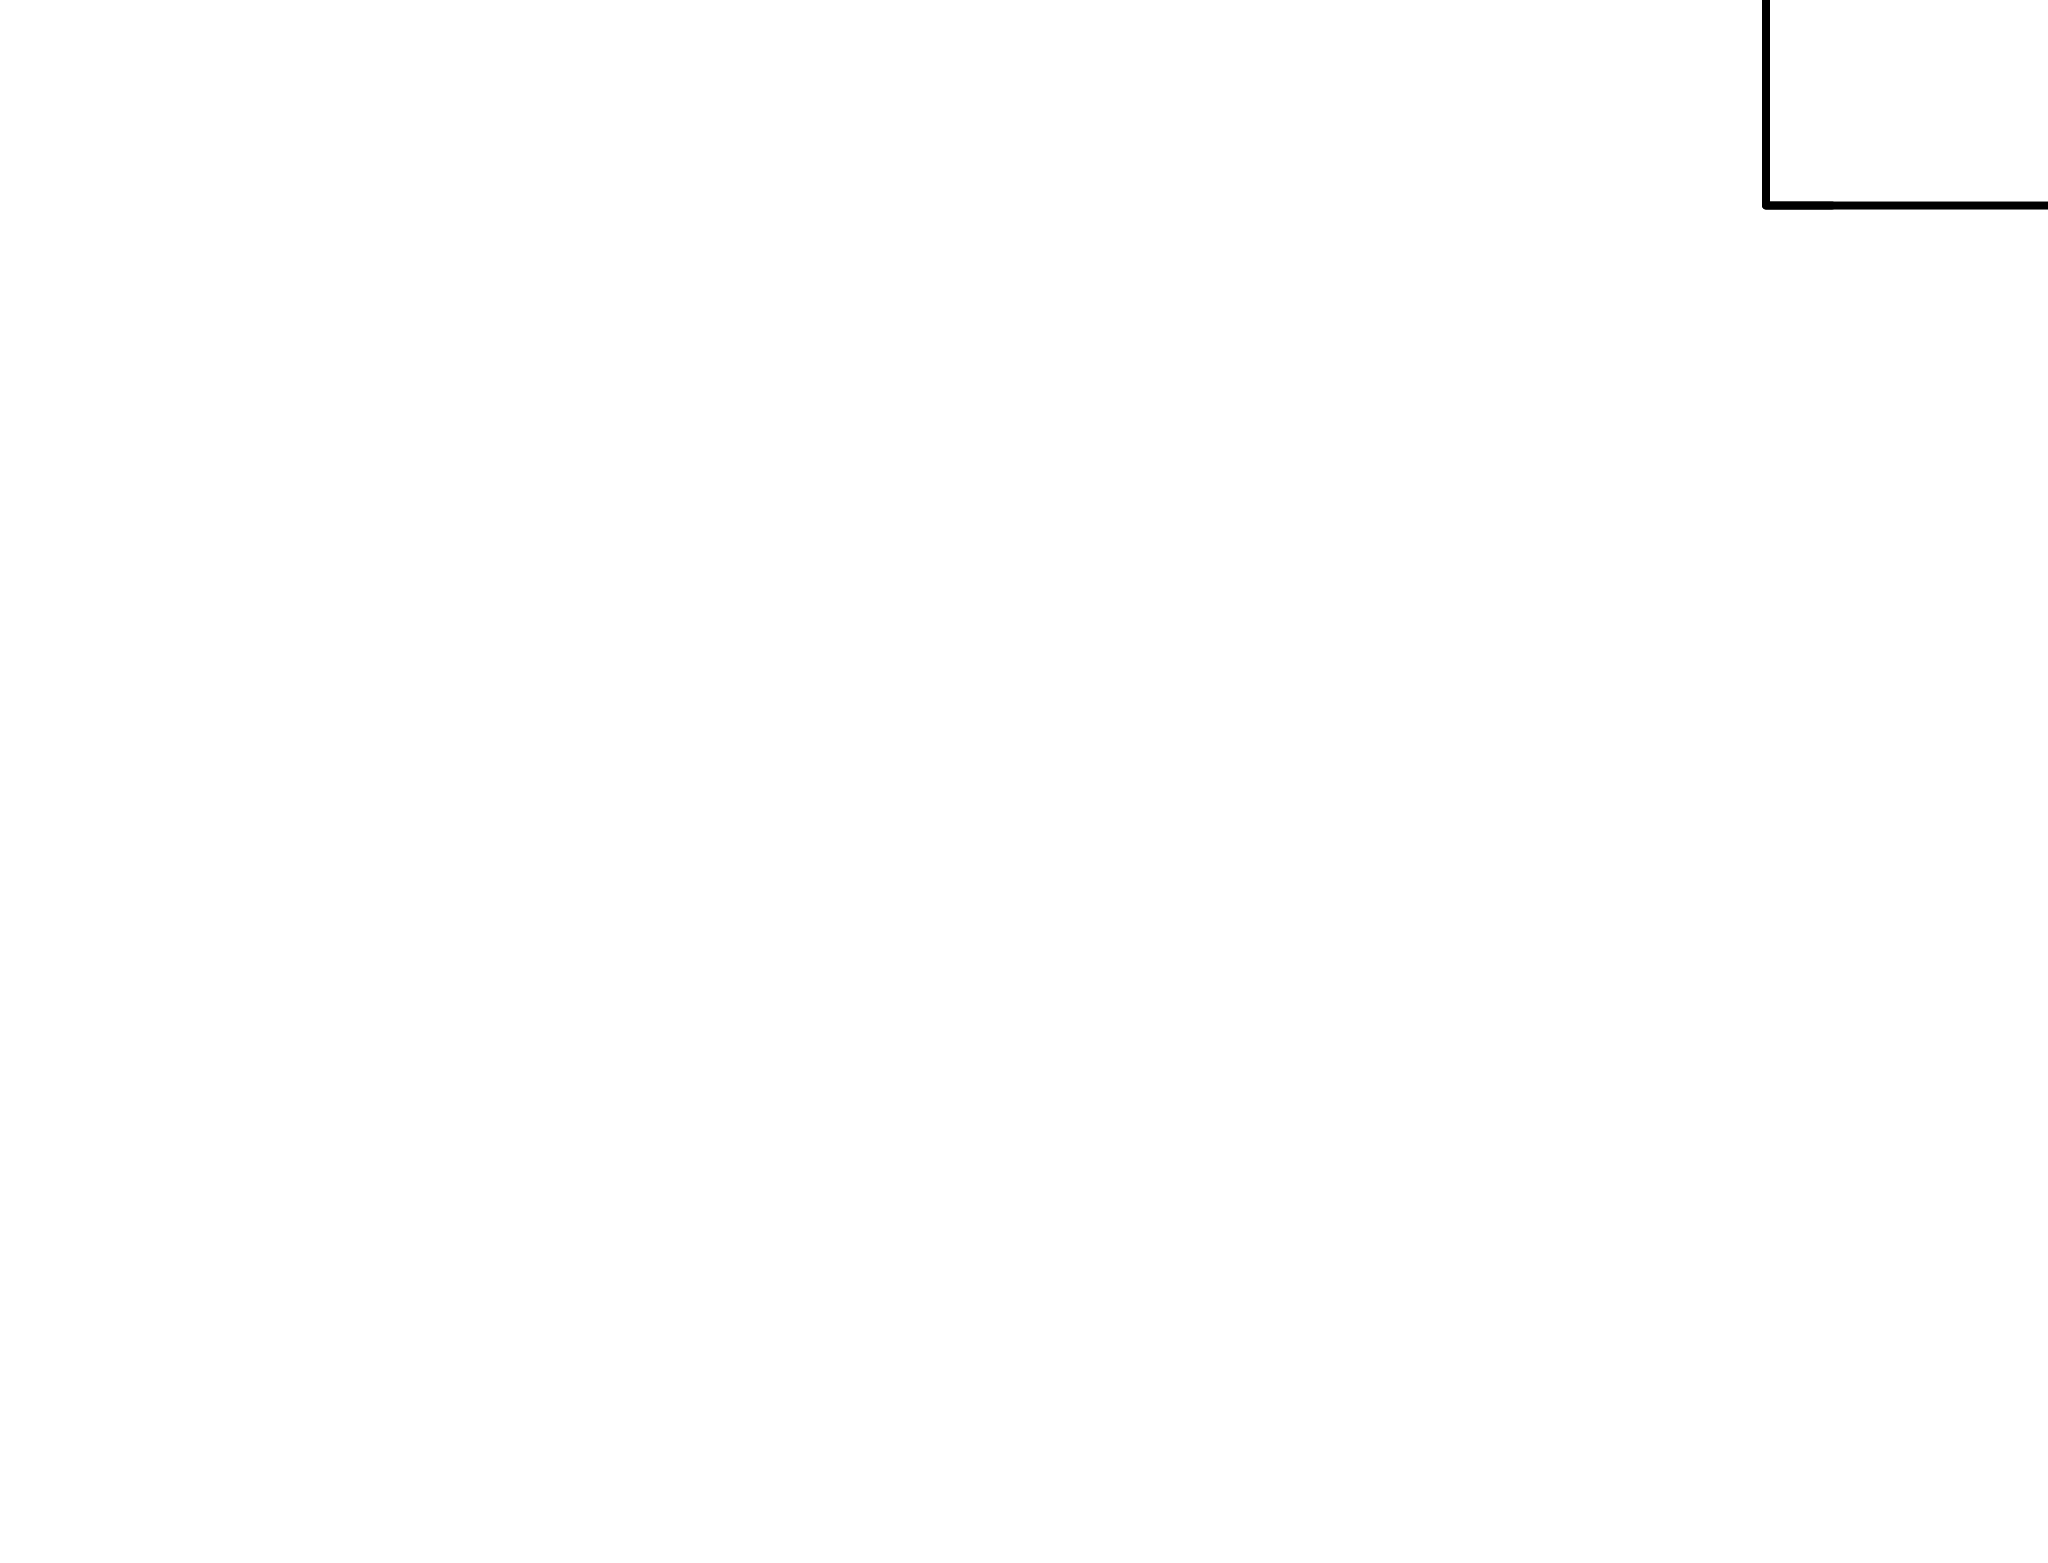

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (76) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

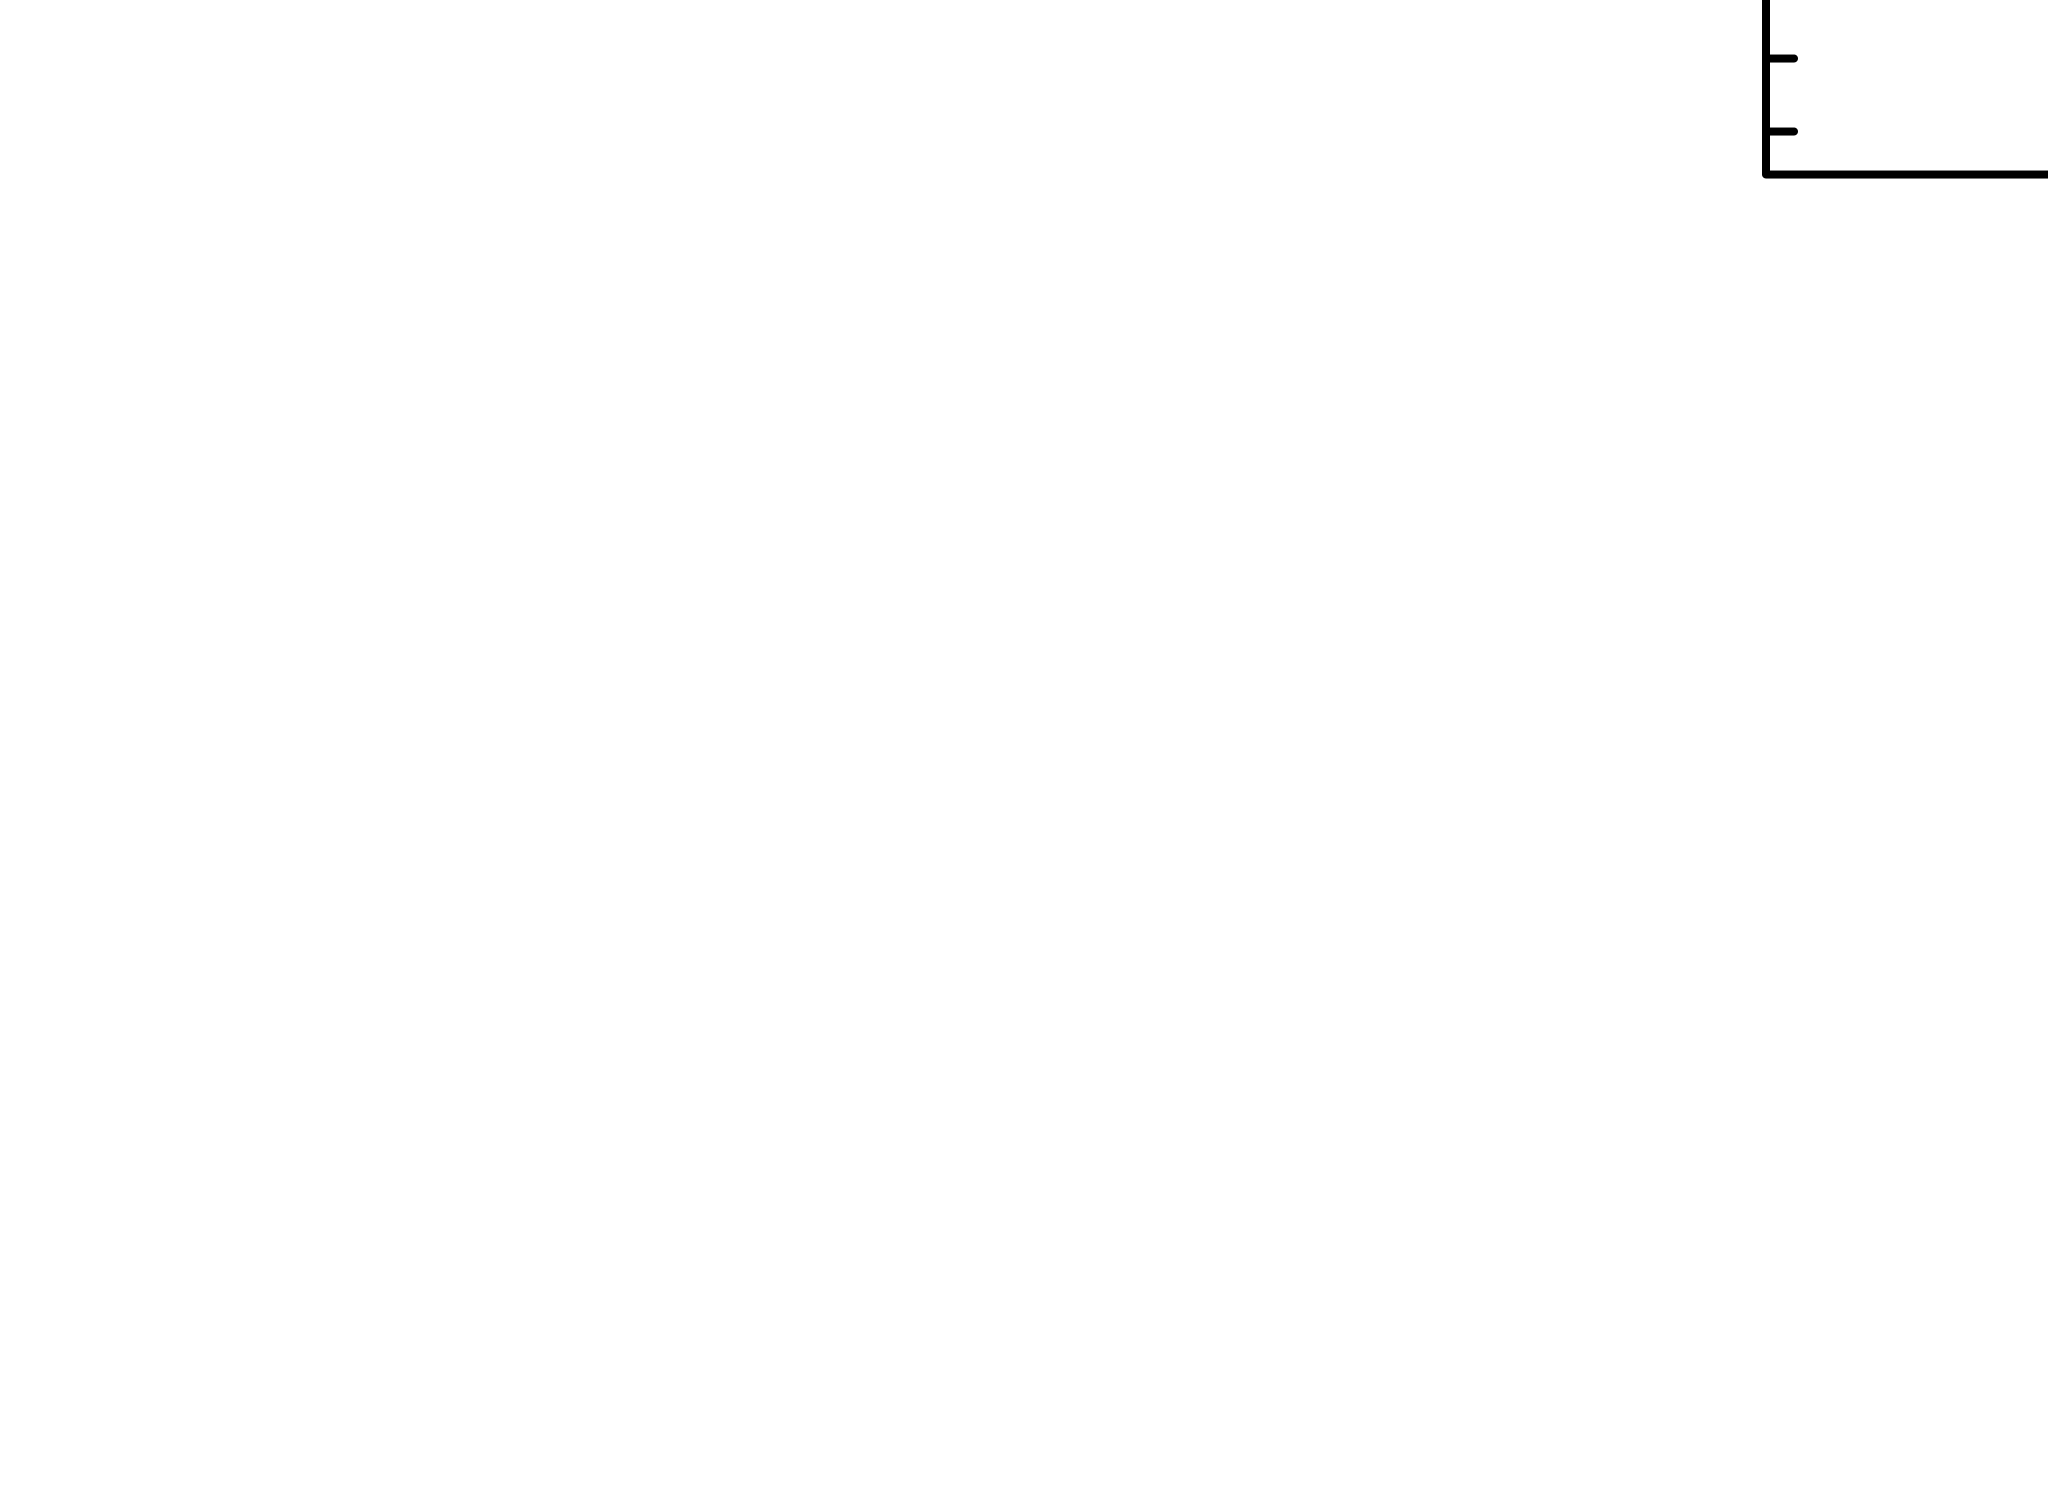

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.339745e+10     using 75 bins.

Test statistic : Chi-Squared              8.339745e+10     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
116.365      35.7926      -1       1.70927    0.00262432   2.07709e-05
85.7636      702461       -2       3.34804    -0.0333397   2.60028e-05
82.17        26545.4      -2       5.31314      0.228360   4.02992e-0

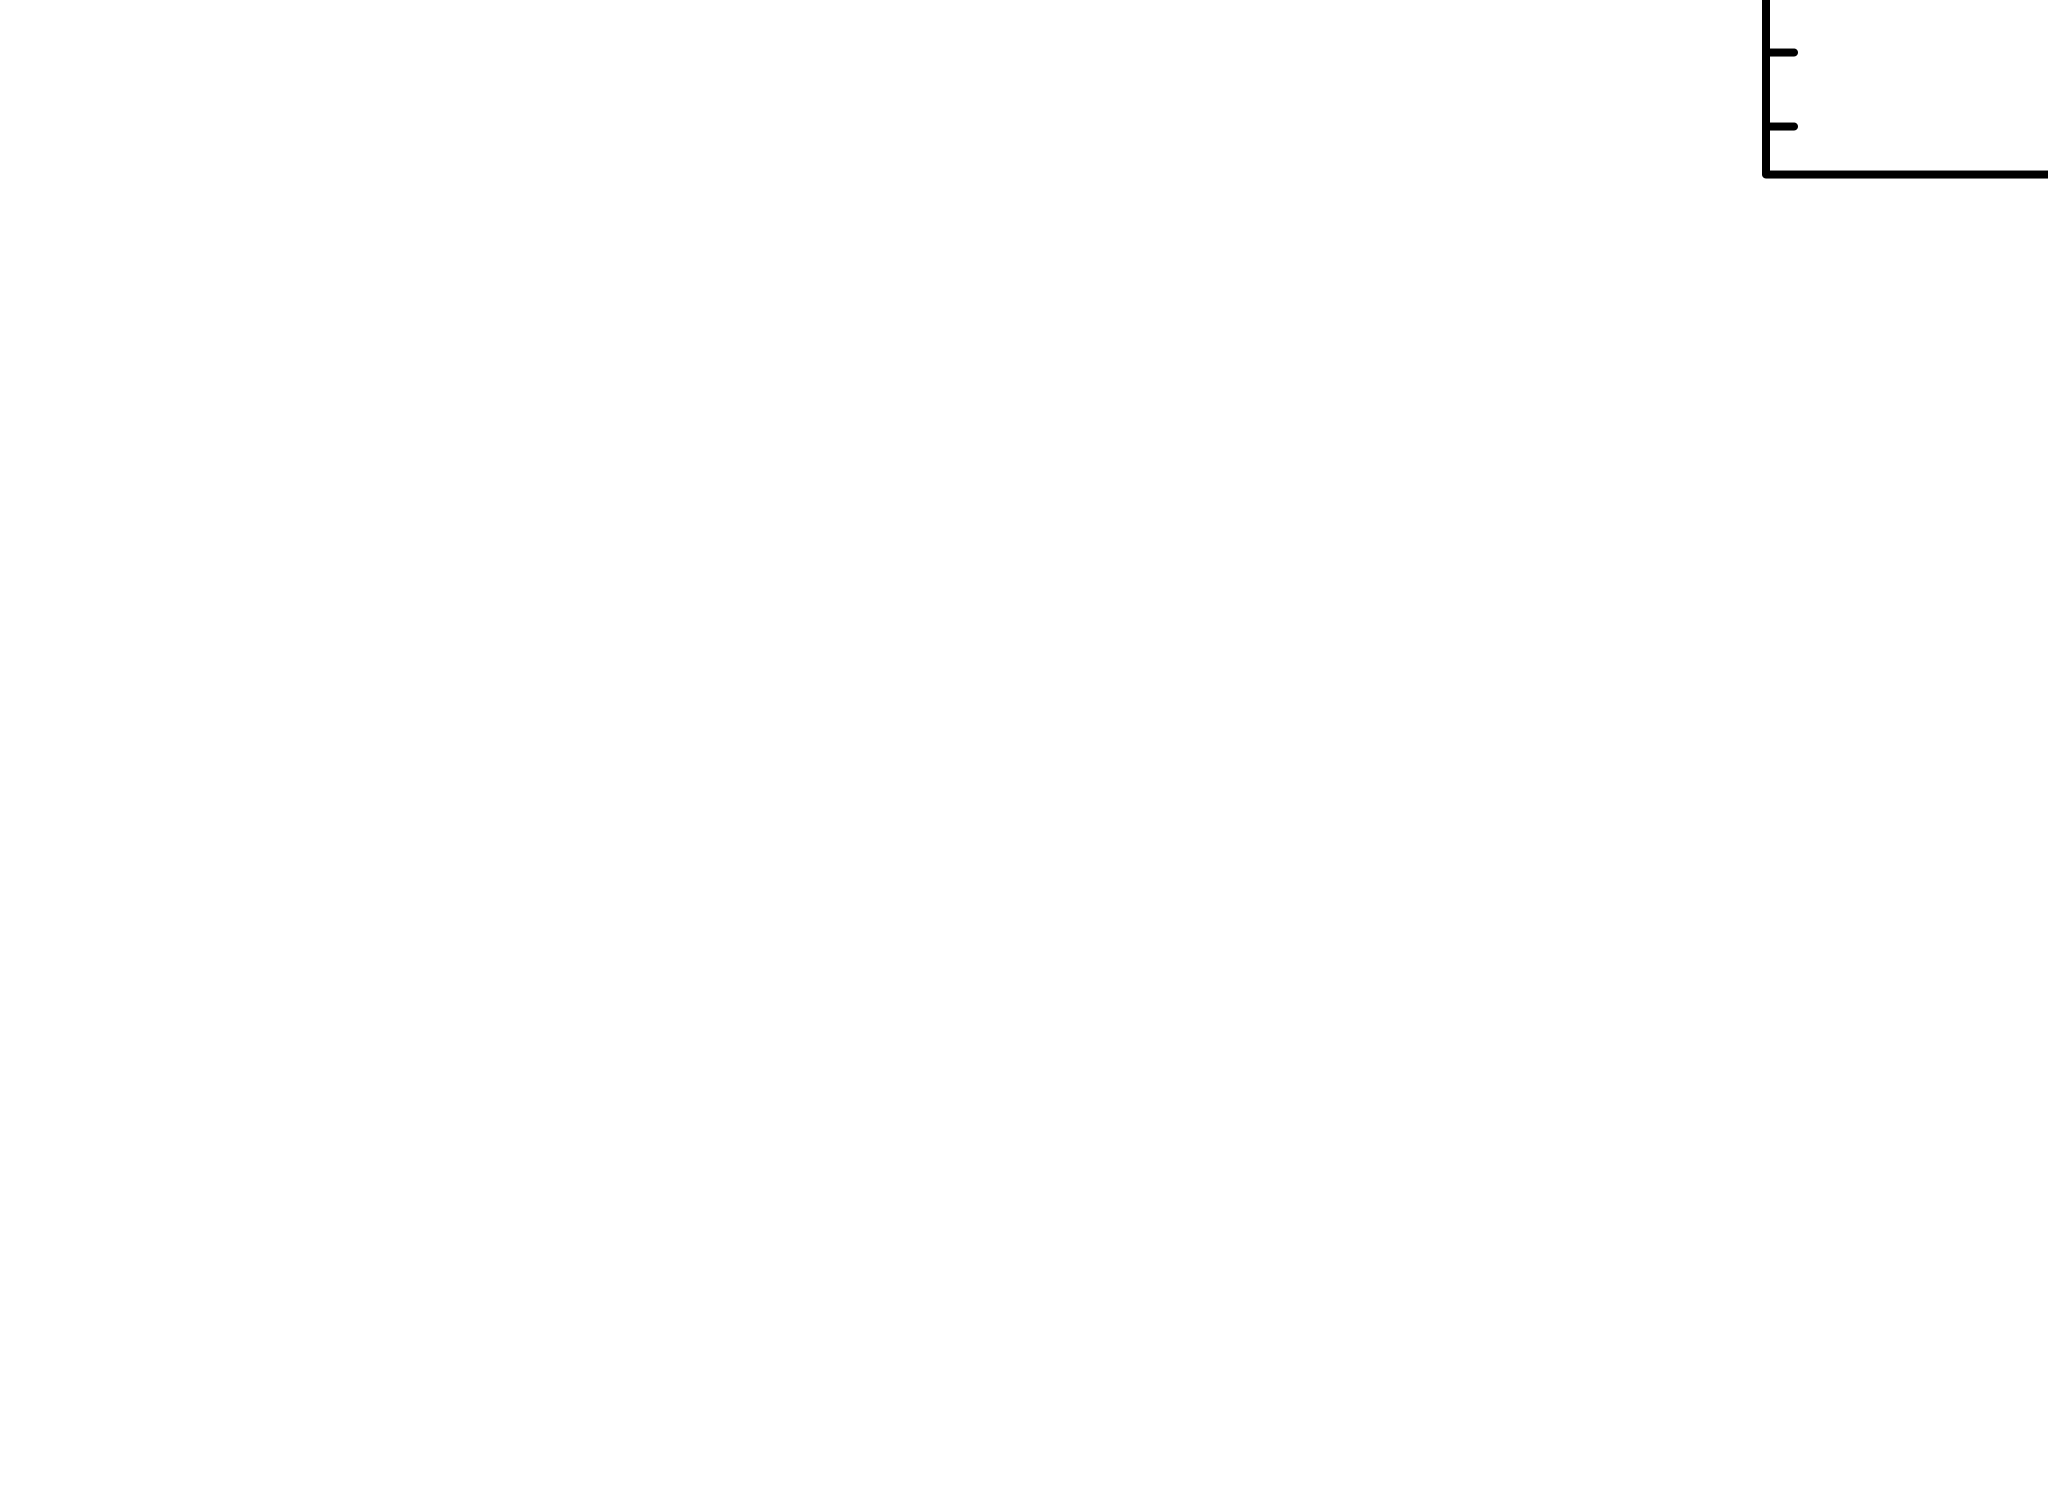

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.912508e+10     using 75 bins.

Test statistic : Chi-Squared              1.912508e+10     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
396.043      10.3957       0       1.28820       36.5702   5.87470e-05
255.481      230418       -1       3.07262       199.347   0.000241034
84.0785      103726       -2       7.58577       199.360   0.000773784


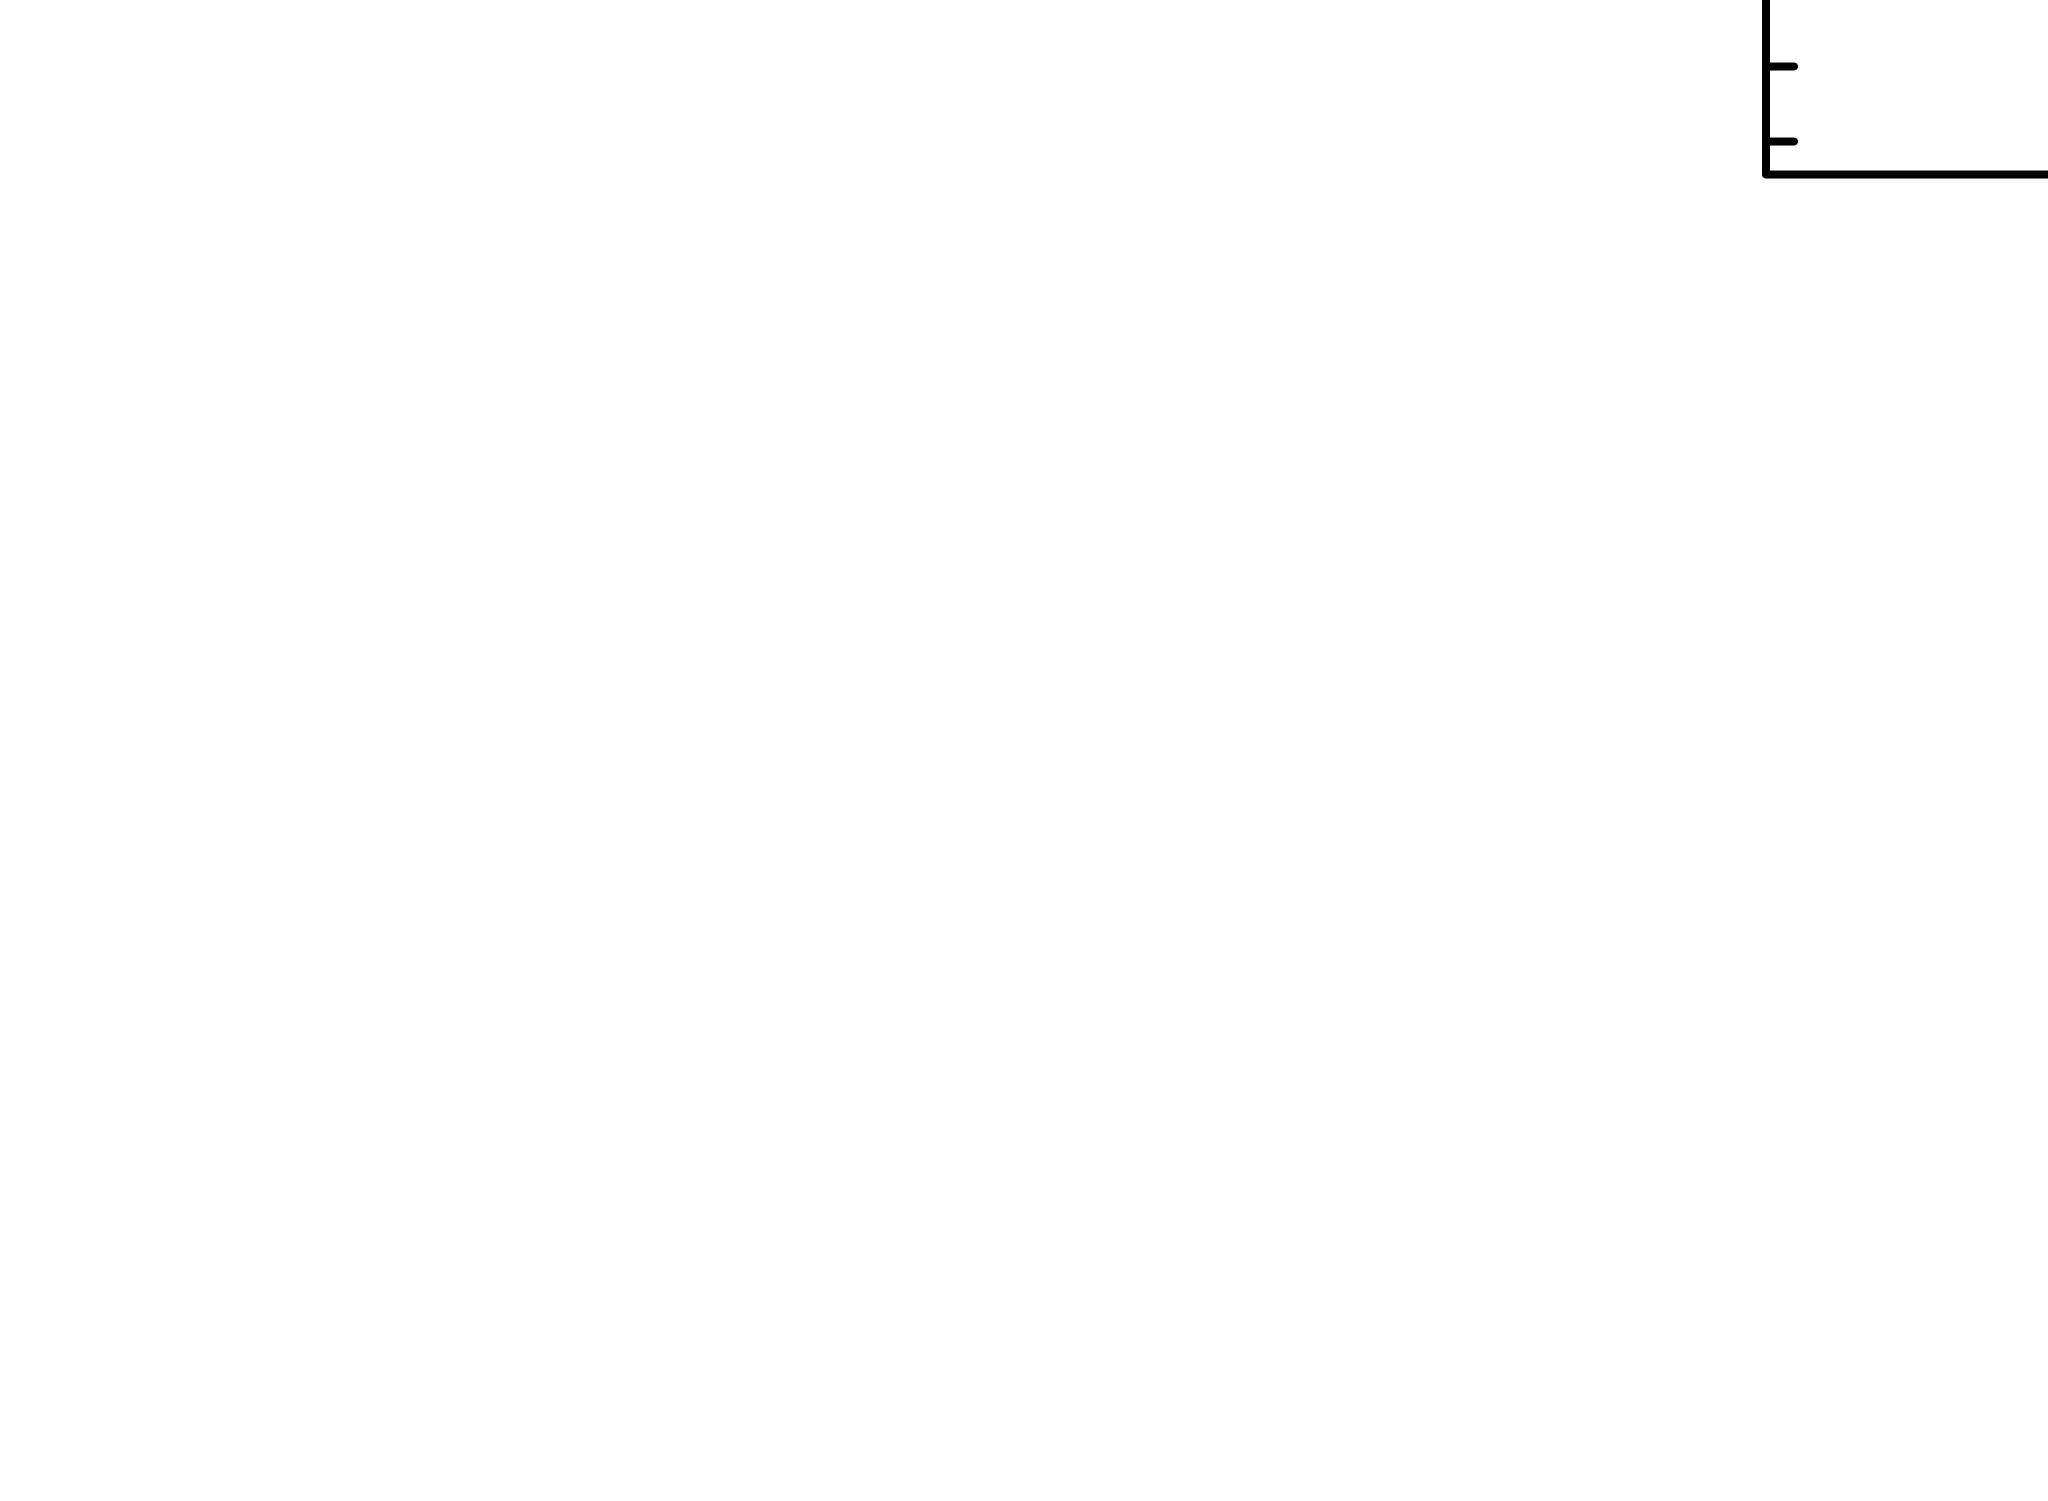

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

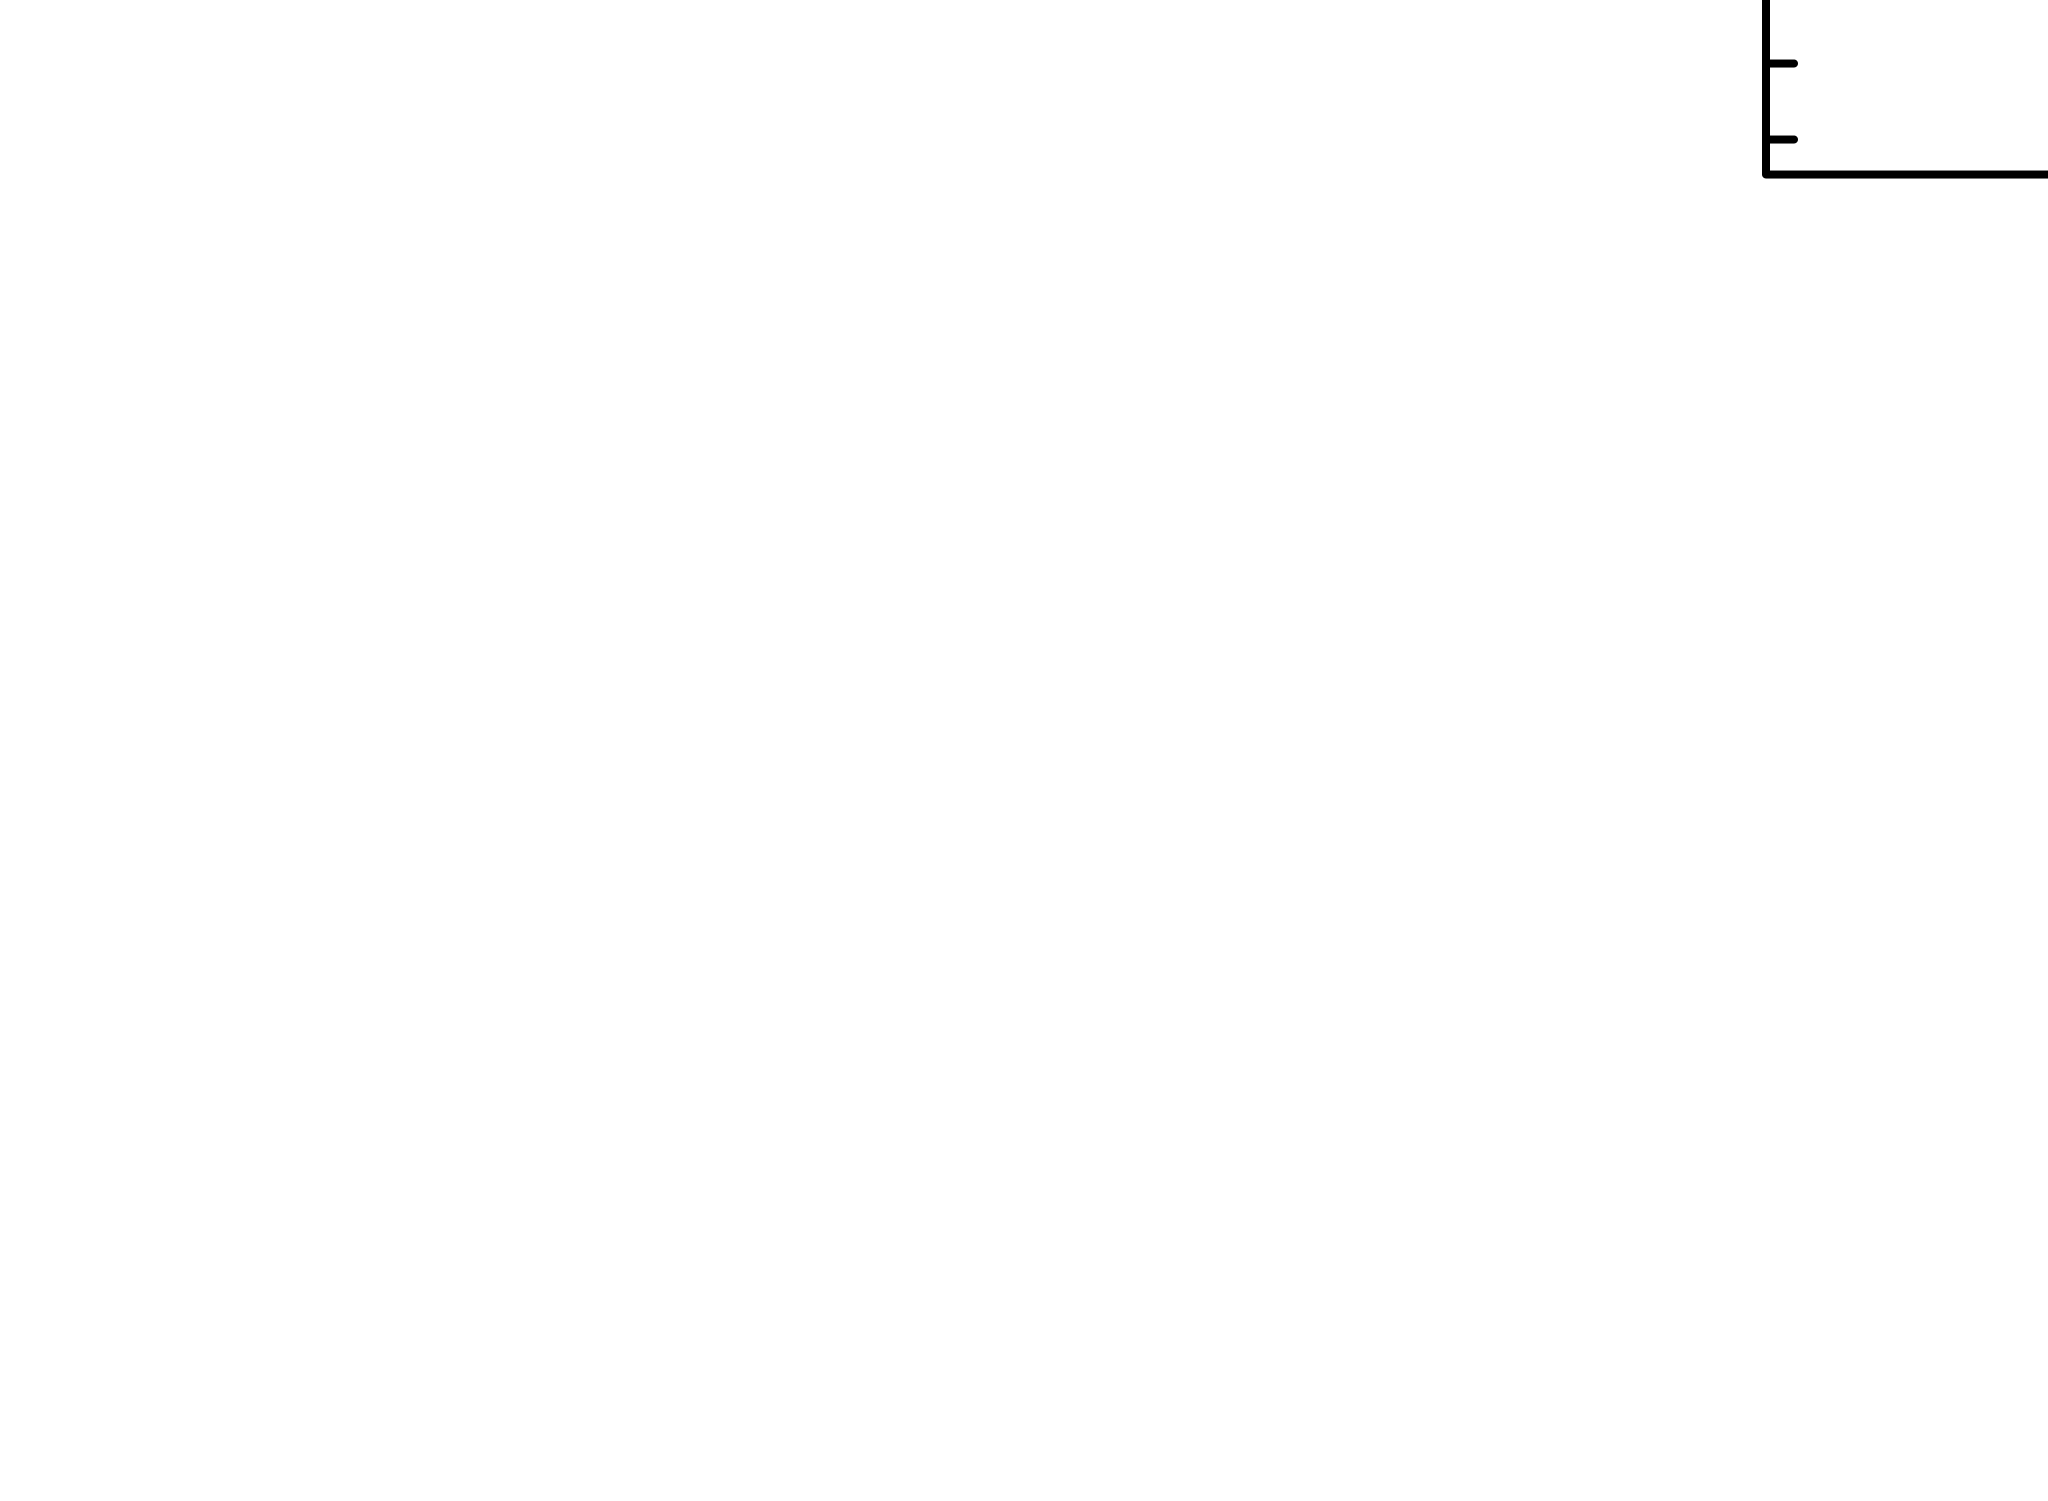


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.538873e+09     using 75 bins.

Test statistic : Chi-Squared              8.538873e+09     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 72 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
509.927      1.87796      -3       2.76363      0.588595   

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.415635e+10     using 75 bins.

Test statistic : Chi-Squared              3.415635e+10     using 75 bins.
 Null hypothesis probability

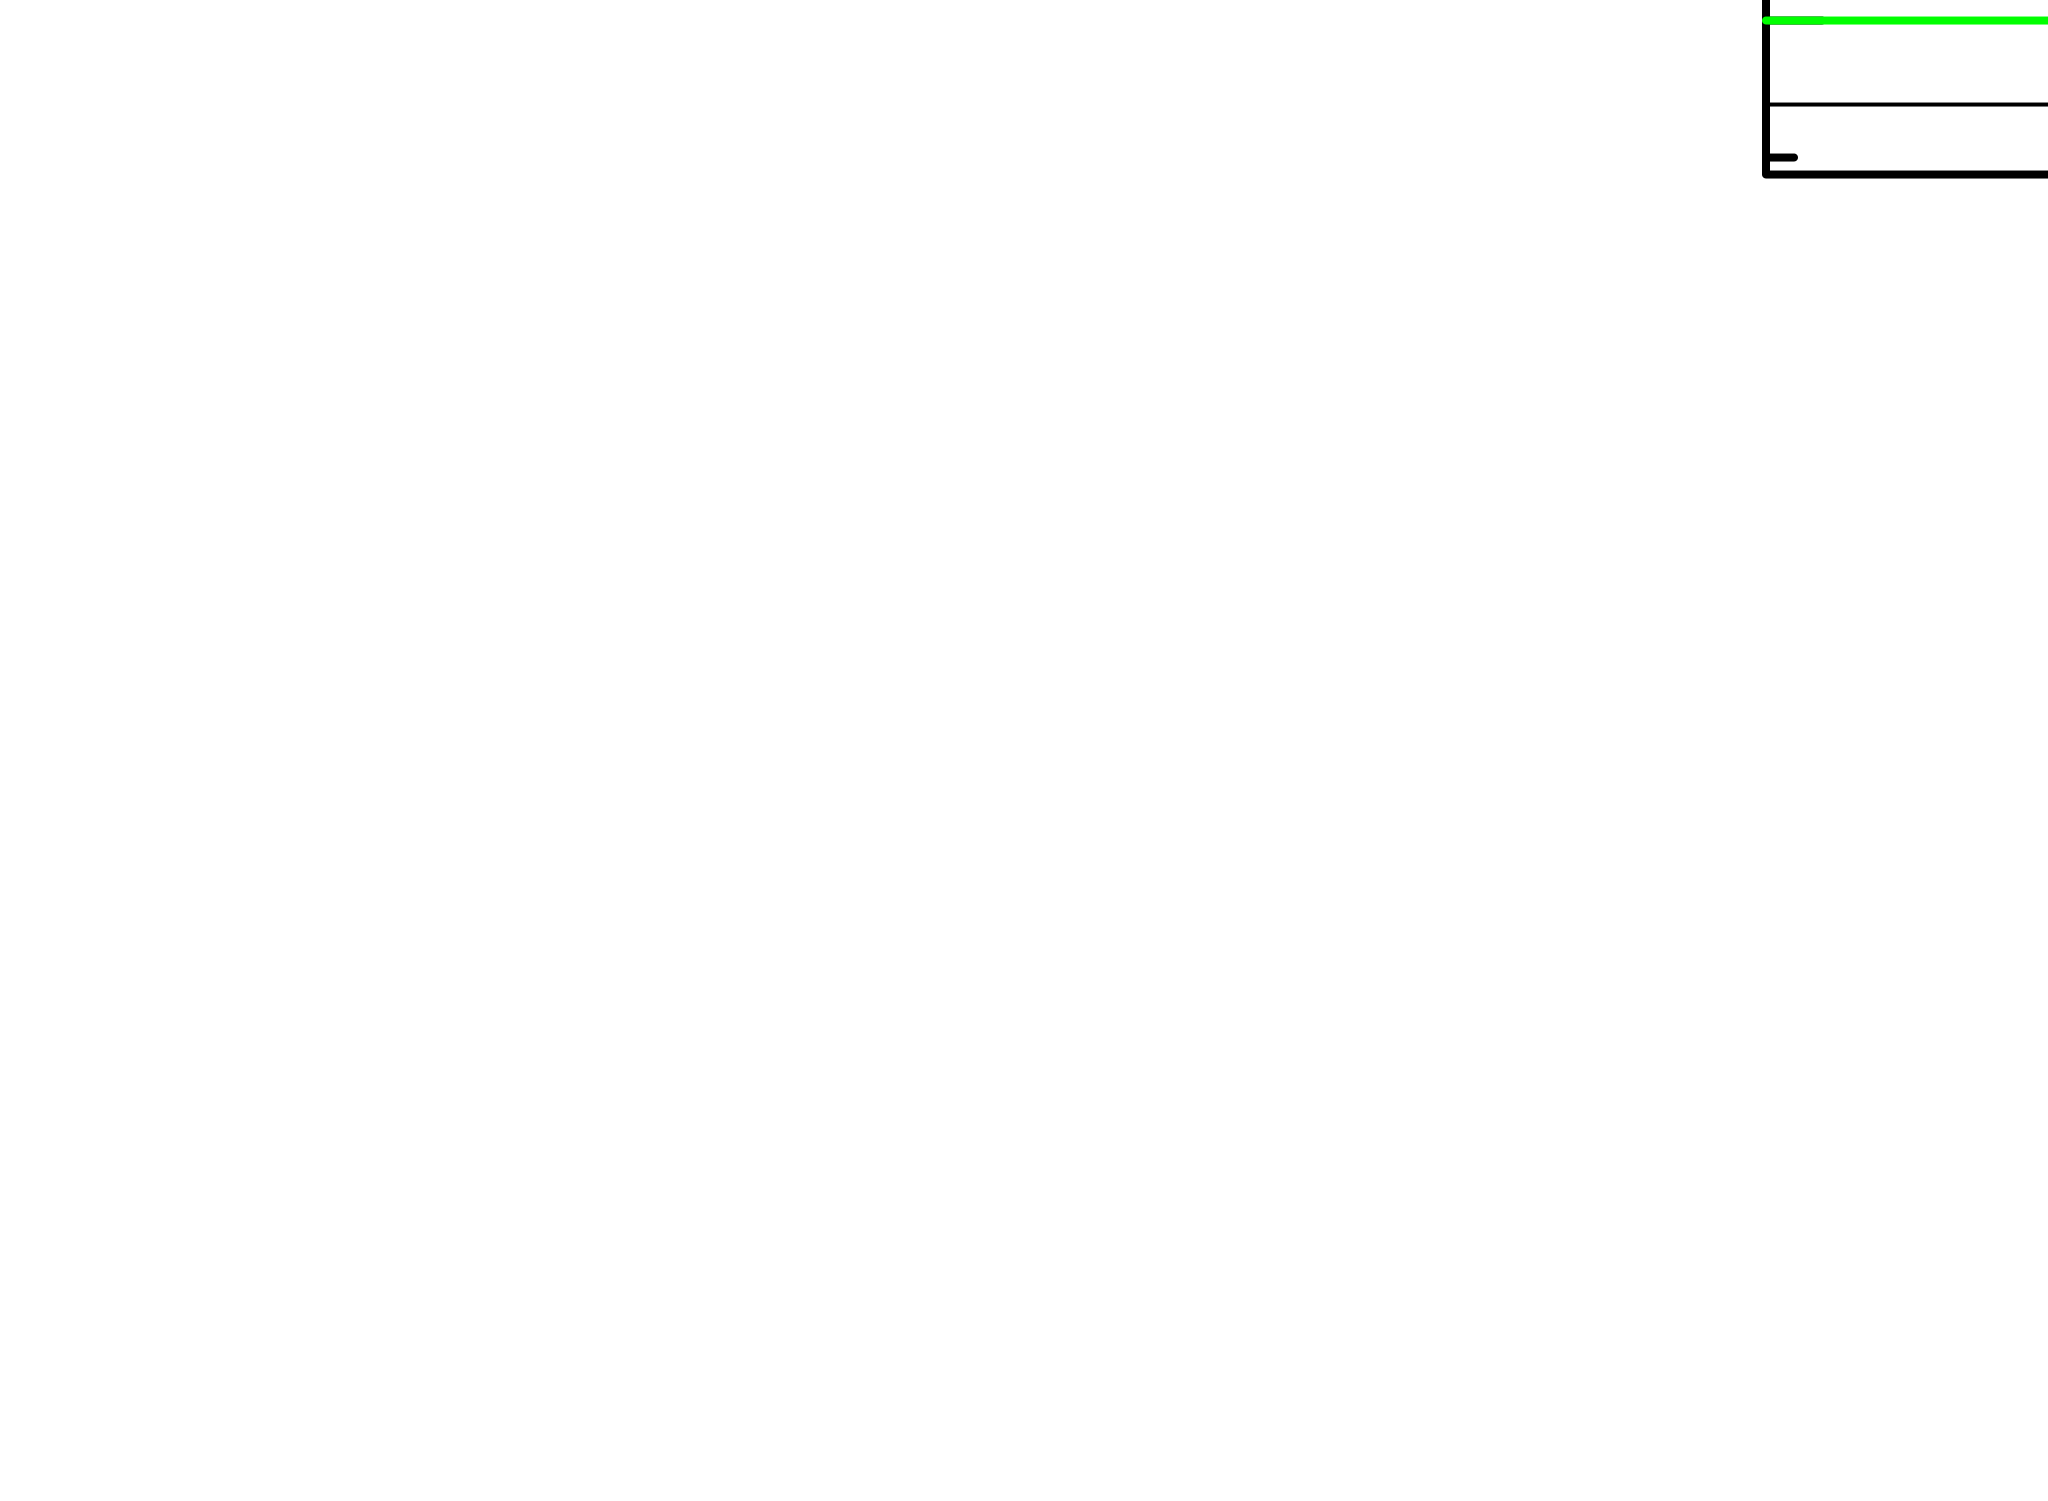

In [7]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.481219e+11     using 75 bins.

Test statistic : Chi-Squared              5.481219e+11     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 70 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm 

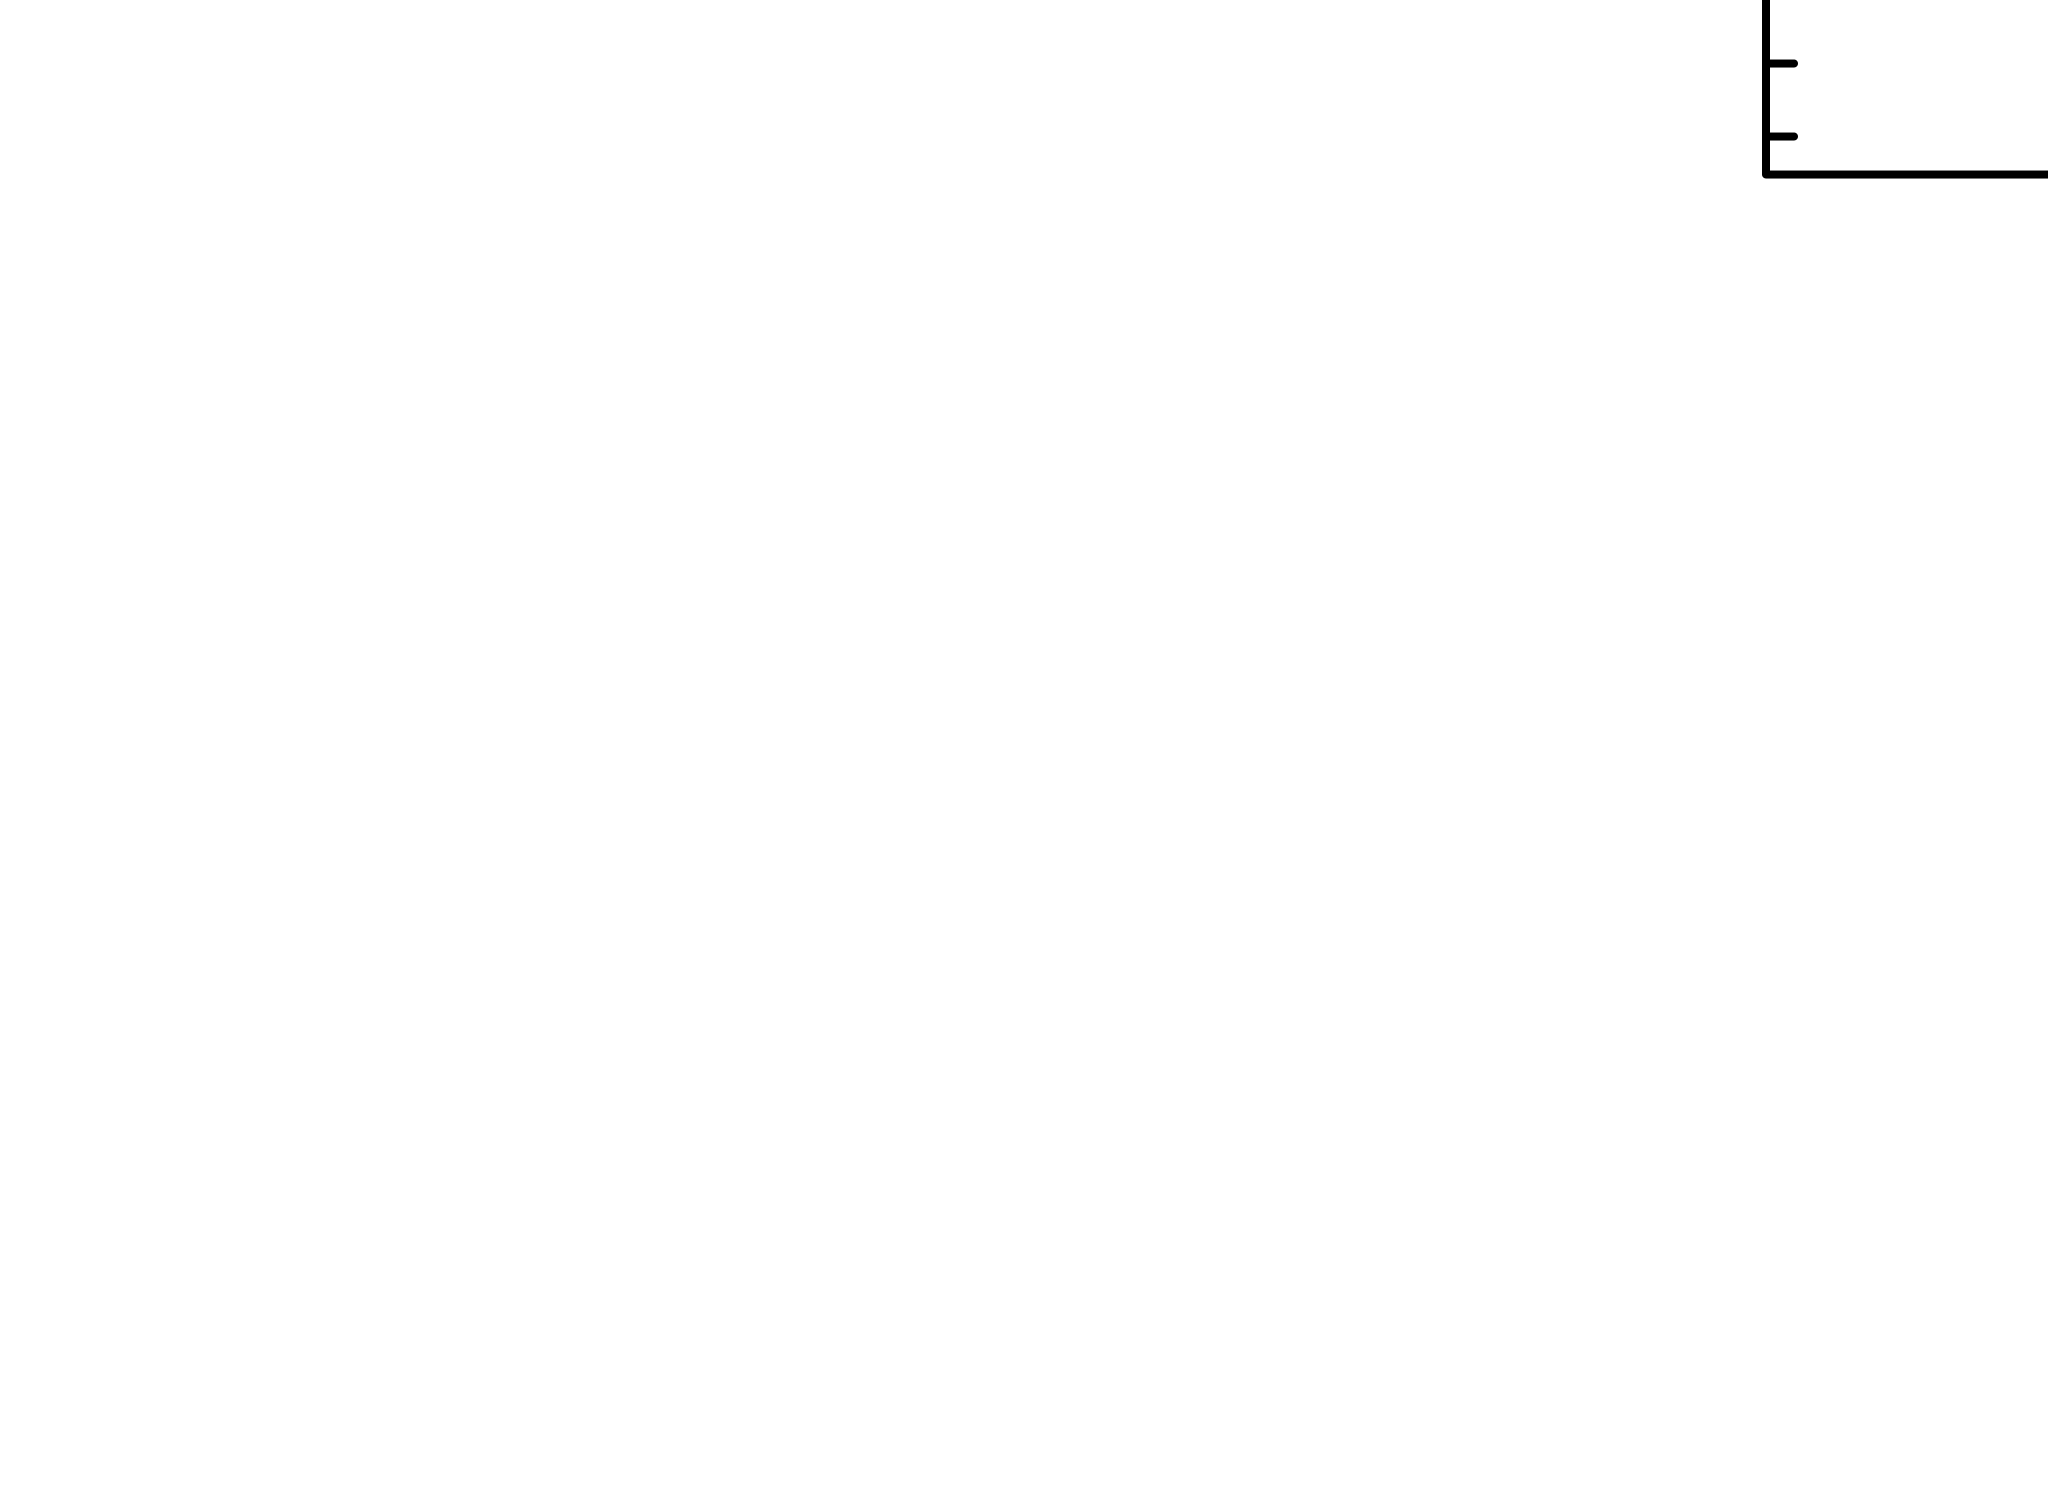

   4:PhoIndex        5:norm
119.274      274910       -1       1.52535       2.84276   4.04382e-05      0.942005   1.20555e-05
86.8556      387313       -1       2.35798       2.85806   4.56769e-05       1.00846   4.90459e-06
74.3639      175132       -1       3.44661       2.78993   4.82889e-05       1.34437   6.24891e-07
70.8098      101143       -1       4.41458       2.69146   4.85514e-05       8.50764   1.90508e-07
65.0162      107081       -2       6.91304       2.24877   3.89046e-05       9.26639     0.0125458
64.2801      45557.8      -1       7.41620       2.20104   3.94101e-05       9.49452     0.0450673
64.2739      2284.87       0       7.43654       2.19891   3.94089e-05       9.49921     0.0459689
64.2704      3039.25       0       7.45625       2.19693   3.94027e-05       9.49979     0.0467977
64.2667      3405.63       0       7.47516       2.19500   3.93938e-05       9.49993     0.0475234
64.2629      3604.85       0       7.49317       2.19311   3.93832e-05       9.49

In [8]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100000     +/-  0.0          
   8    4   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.048136e+11     using 75 bins.

Test statistic : Chi-Squared              9.048136e+11     using 75 bins.
 Null hypothesis probability of 0.00

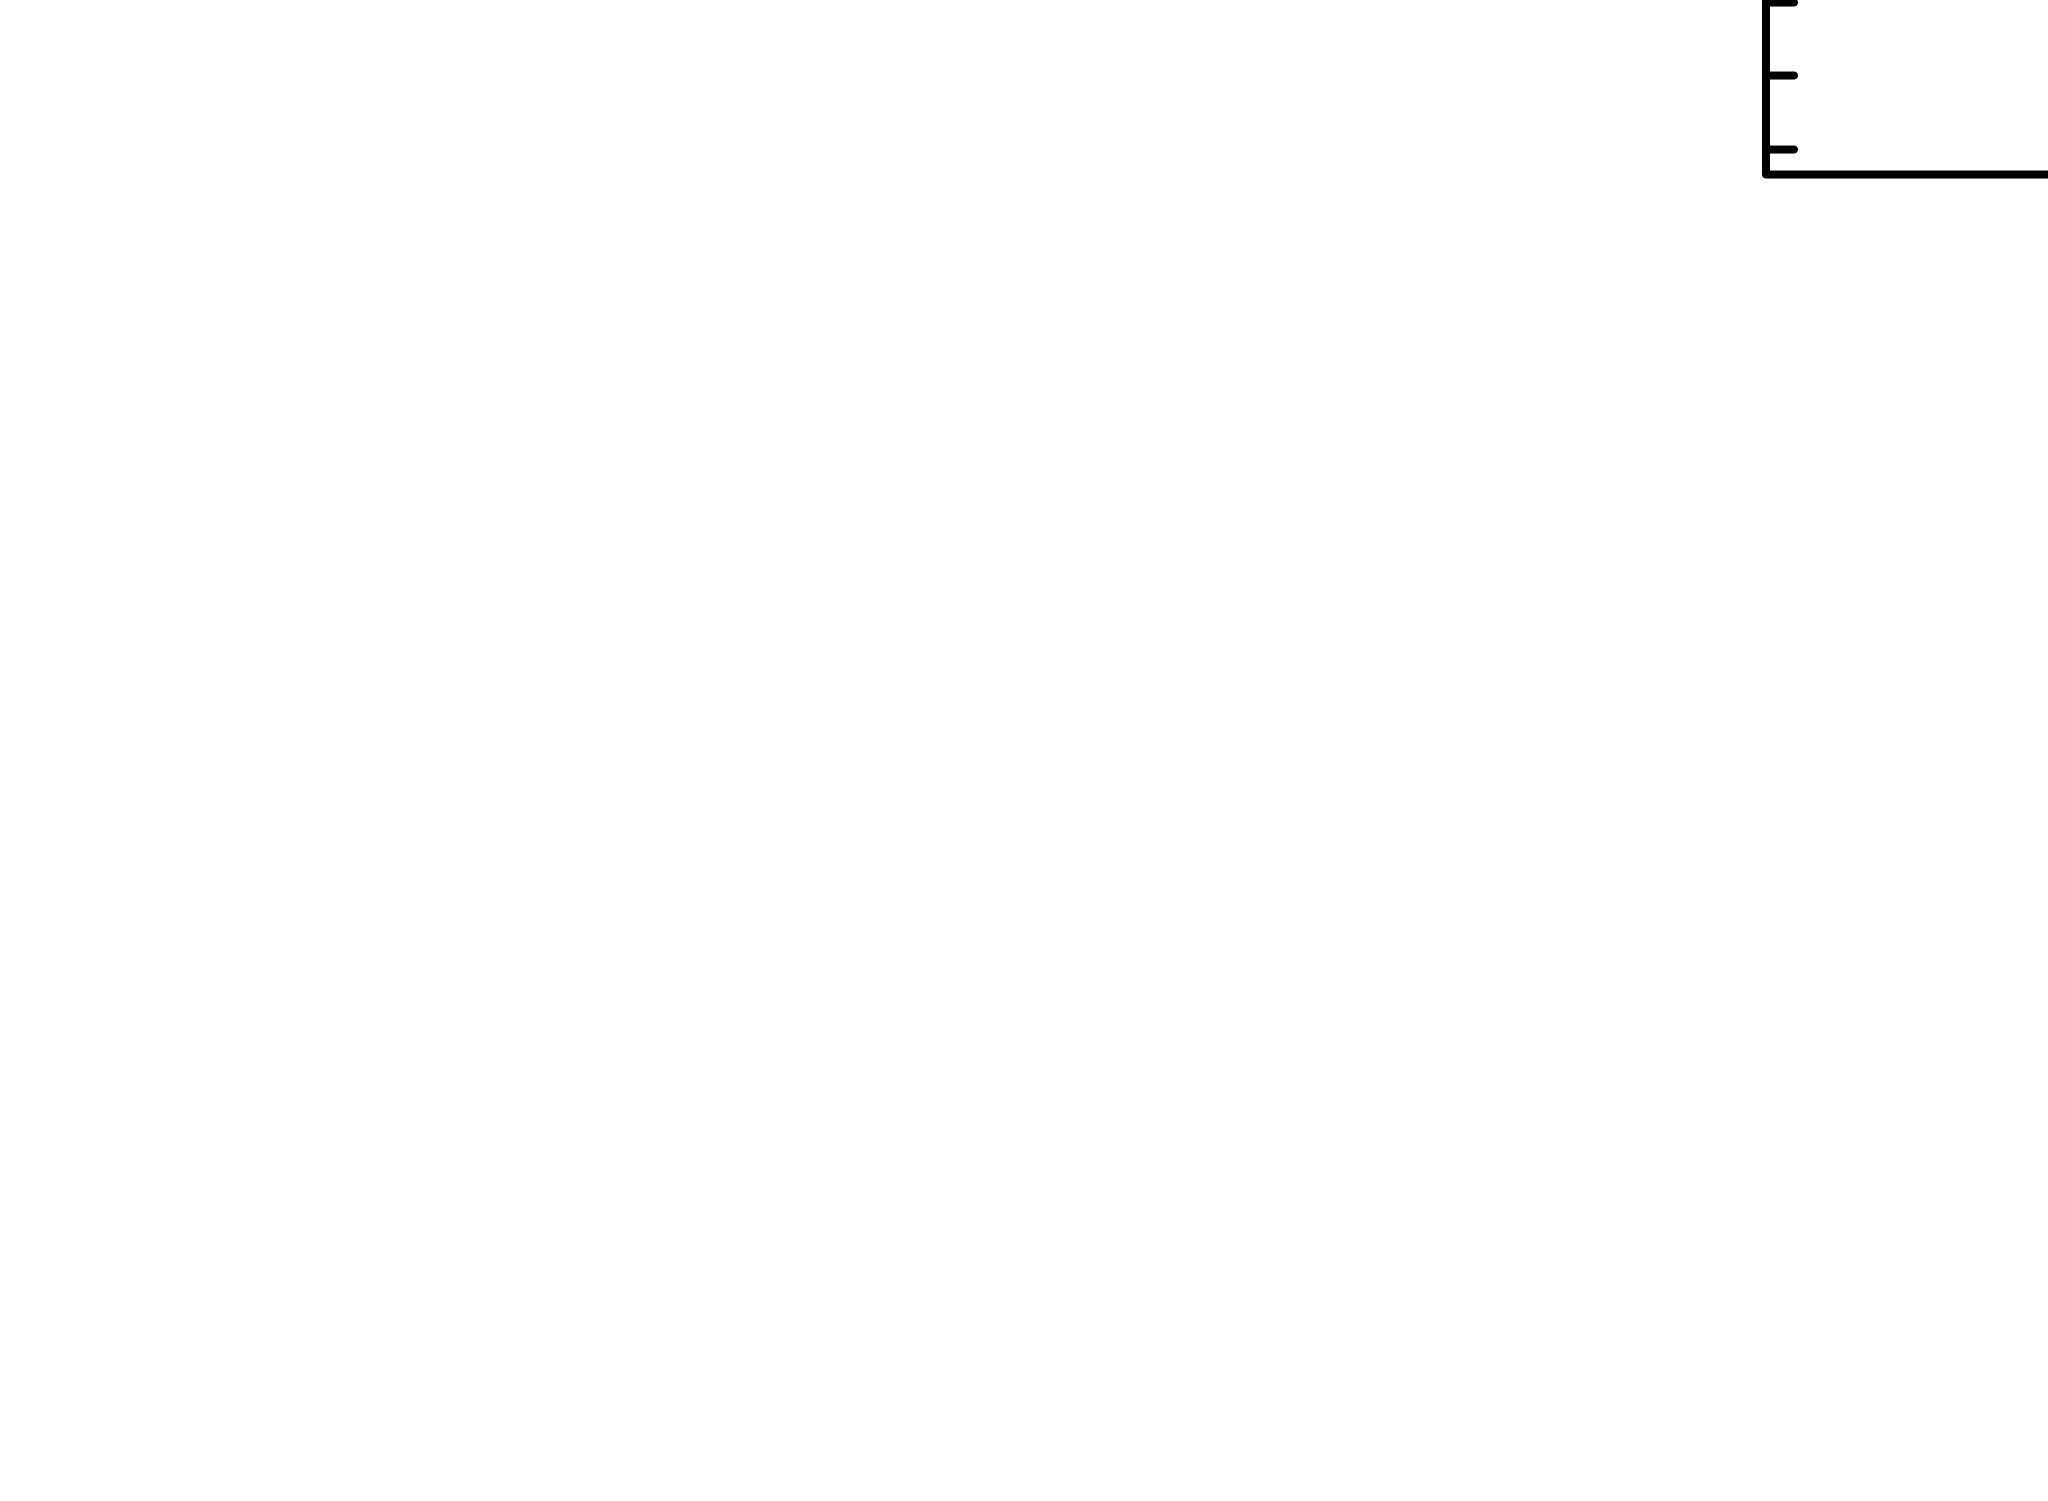

   3.94481e-06     0.0755984   3.39404e-06
77.4302      84219.2      -2       4.05029       2.57778   4.55401e-05      0.225968   1.49063e-06     0.0335737   1.79379e-06
70.0874      288354       -2       5.50283       2.43639   4.50731e-05       1.05228   6.60972e-07    0.00773272   1.87408e-06
67.2281      155466       -2       6.45677       2.26083   4.17155e-05       6.49379   3.12891e-07    0.00172086   1.74955e-06
63.7981      120174       -2       7.13130       2.11047   3.70792e-05       9.48858     0.0144705   0.000499357   2.13037e-06
***Warning: Zero alpha-matrix diagonal element for parameter 7
 Parameter 7 is pegged at 0.000499357 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
63.1576      31010.5      -1       7.69925       2.10642   3.73286e-05       9.49923     0.0569667   0.000499357   2.23245e-06
63.132       5153.93       0       7.71595       2.10743   3.73380e-05       9.49984     0.0562803   0.000499357   2.240

In [10]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")


Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.268440e+11     using 75 bins.

Test statistic : Chi-Squared              3.268440e+11     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 69 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.230877e+11     using 75 bins.

Test statist

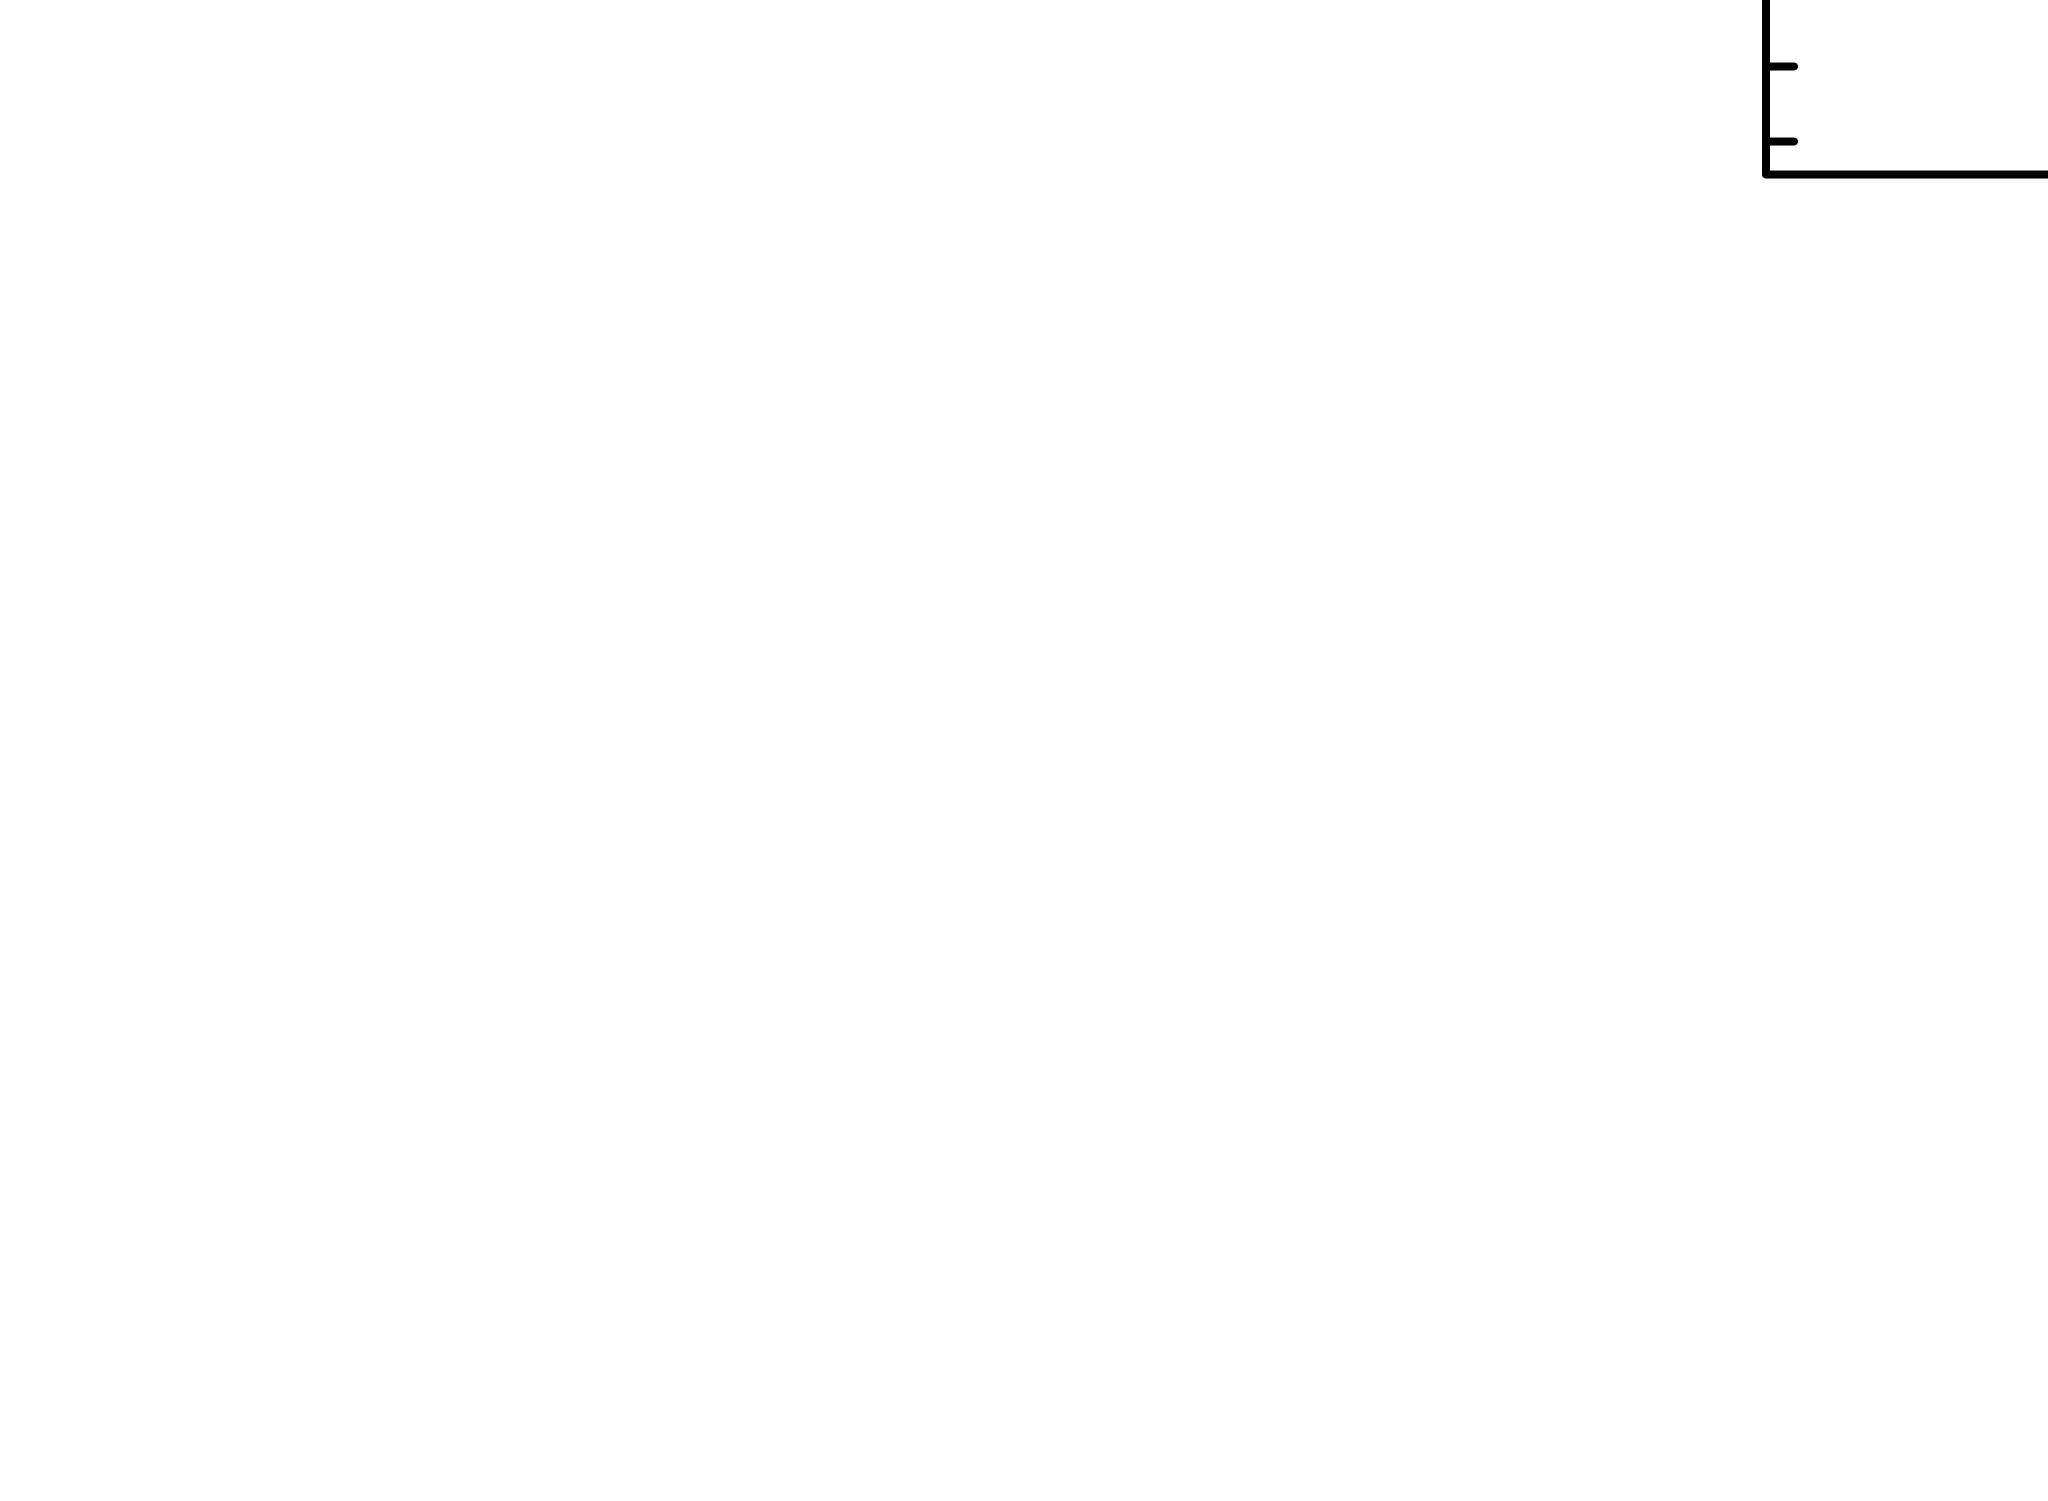


Fit statistic  : Chi-Squared              3.230877e+11     using 75 bins.

Test statistic : Chi-Squared              3.230877e+11     using 75 bins.
 Null hypothesis probability of 0.000000e+00 with 70 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm       5:Sigma        6:norm
146.477      508245        0       1.58352      0.203915   2.82576e-05      0.133819   1.79909e-05
89.371       378283       -1       2.84339     0.0641853   2.88225e-05      0.126011   5.47161e-06
78.2949      66956.9      -2       4.80566      0.212986   4.01934e-05     0.0140057   1.31465e-06
75.5937      150760       -2       6.66232      0.442843   6.16685e-05    0.00199894   2.29917e-06
71.2978      144519       -2       7.98713      0.634234   9.23705e-05   4.80934e-05   2.42473e-06
***Warning: Zero alpha-matrix diagonal element for parameter 5
 Parameter 5 is pegged at 4.80934e-05 

In [11]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00019464 photons (2.1211e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)
